In [10]:
# 1 DEFINE THE PROBLEM
## Find most accurate algorithm to use on above dataset, save model for later use

# 1.1 LOAD LIBRARIES
import pandas as pd
import numpy as np
import matplotlib
import sklearn
import scipy
import matplotlib.pyplot as plt
import pickle
## Will load other libraries on the go
from pandas.plotting import scatter_matrix 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, LeaveOneOut, cross_val_score, ShuffleSplit, GridSearchCV
from sklearn.linear_model import LogisticRegression, Ridge 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1.2 LOAD DATASET
url = ('datasets/pima-indians-diabetes.data.csv')
#names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Class']
names = ['Preg', 'Glu', 'BP', 'SkinT', 'Ins', 'BMI', 'DPF', 'Age', 'Class']
dataset = pd.read_csv(url, names=names)

    Preg  Glu  BP  SkinT  Ins   BMI    DPF  Age  Class
0      6  148  72     35    0  33.6  0.627   50      1
1      1   85  66     29    0  26.6  0.351   31      0
2      8  183  64      0    0  23.3  0.672   32      1
3      1   89  66     23   94  28.1  0.167   21      0
4      0  137  40     35  168  43.1  2.288   33      1
5      5  116  74      0    0  25.6  0.201   30      0
6      3   78  50     32   88  31.0  0.248   26      1
7     10  115   0      0    0  35.3  0.134   29      0
8      2  197  70     45  543  30.5  0.158   53      1
9      8  125  96      0    0   0.0  0.232   54      1
10     4  110  92      0    0  37.6  0.191   30      0
11    10  168  74      0    0  38.0  0.537   34      1
12    10  139  80      0    0  27.1  1.441   57      0
13     1  189  60     23  846  30.1  0.398   59      1
14     5  166  72     19  175  25.8  0.587   51      1
15     7  100   0      0    0  30.0  0.484   32      1
16     0  118  84     47  230  45.8  0.551   31      1
17     7  

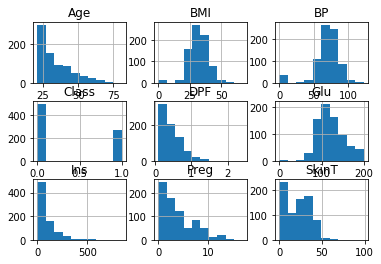

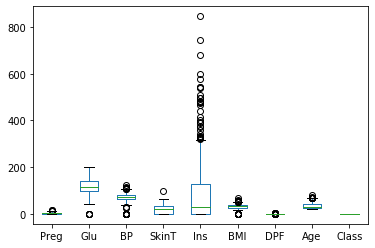

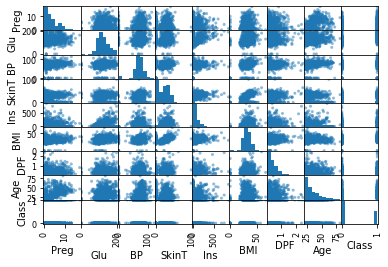

In [11]:
# 2 SUMMERIZE DATA
# 2.1 Descriptive Statistics
print(dataset.head(30))
print(dataset.shape)
print(dataset.dtypes)
print(dataset.describe())
print(dataset.corr())

# 2.2 Data Visualization
dataset.hist()
dataset.plot(kind='box')
plt.show()
scatter_matrix(dataset)
plt.show()

In [12]:
# 3 PREPARE DATA
# 3.1 Data cleaning
# 3.1.1 Split in to train and test sets
array = dataset.values

# seperate array into input and output components
X = array[:, 0:8]
Y = array[:, 8]

# 3.2 Feature selection
scalar = StandardScaler().fit(X)
rescaledX = scalar.transform(X)

# 3.3 Data transfrom
# summerize transfromed data
np.set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[ 0.64   0.848  0.15   0.907 -0.693  0.204  0.468  1.426]
 [-0.845 -1.123 -0.161  0.531 -0.693 -0.684 -0.365 -0.191]
 [ 1.234  1.944 -0.264 -1.288 -0.693 -1.103  0.604 -0.106]
 [-0.845 -0.998 -0.161  0.155  0.123 -0.494 -0.921 -1.042]
 [-1.142  0.504 -1.505  0.907  0.766  1.41   5.485 -0.02 ]]


Accuracy (test dataset): 75.591%
Accuracy (KFold): 76.951% (4.841%)
Accuracy (LeaveOneOut): 76.823% (42.196%)
Accuracy (ShuffleSplit): 76.496% (1.698%)

LR: 0.7664781297134239 (0.07017548015744995)
LDA: 0.7682880844645551 (0.06758301632445639)
KNN: 0.7274132730015083 (0.06315114412479074)
SVM: 0.7605957767722473 (0.06389805234674763)


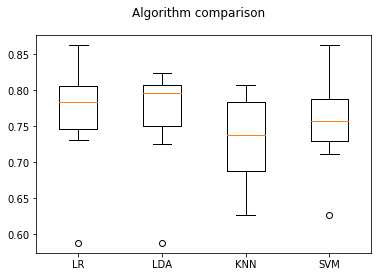

In [13]:
# 4 EVALUVATE ALGORITHMS
# 4.1 Split-out test-dataset to train
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
model = LogisticRegression(solver='liblinear')

# 4.2 Test options and evaluations metric
# 4.2.1 test dataset cross validation
model.fit(X_train, Y_train)
results = model.score(X_test, Y_test)
print('Accuracy (test set): %.3f%%' % (results*100.0))

# 4.2.2 KFold cross validation
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)
print('Accuracy (KFold): %.3f%% (%.3f%%)' % (results.mean()*100.0, results.std()*100.0))

# 4.2.3 Leave one out cross validation
loocv = LeaveOneOut()
results = cross_val_score(model, X, Y, cv=loocv)
print('Accuracy (LeaveOneOut): %.3f%% (%.3f%%)' % (results.mean()*100.0, results.std()*100.0))

# 4.2.4 Repeated random test-train splits
ssplit = ShuffleSplit(n_splits=10, test_size=test_size, random_state=seed)
results = cross_val_score(model, X, Y, cv=ssplit)
print('Accuracy (ShuffleSplit): %.3f%% (%.3f%%)\n' % (results.mean()*100.0, results.std()*100.0))

# 4.3 Spot-check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
# models.append(('CART', DecisionTreeClassifier()))
# models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='scale')))

# Cross validation results
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed) # KFold was the most accurate validation
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = name + ': ' + str(cv_results.mean()) + ' (' + str(cv_results.std()) + ')'
    print(msg)
    
# 4.4 Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [14]:
# 5 IMPROVE RESULTS
# 5.1 Algorithm tuning
'''
LDA algorithm was the most accurate model according to comparison
'''
# Grid search for algorithm tuning
alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
param_grid = dict(alpha=alphas)
model = Ridge()
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid.fit(X, Y)
print(grid.best_score_)
print(grid.best_estimator_.alpha,'\n')

# 5.2 Improve accuracy with ensebles prediction
# Random forest classification
num_trees = 100
max_features = 3
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.2796175593129722
1.0 

0.7603554340396446


In [15]:
# 6 PRESENT RESULTS
# 6.1 Predictions on validation dataset
'''
The LDA algorithm was the most accurate model that we tested
Let's run the LDA model directly on the test dataset and summerize
the final accuracy score as a confusion matrix and a classification report.
'''

# 6.2 Create standalone model on entire training dataset
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)
predictions = lda.predict(X_test)
print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

# Fit the model on training set
model = LogisticRegression(solver='liblinear')
model.fit(X_train, Y_train)

# 6.3 Save model for later use (used pickle insted Joblib)
filename = 'pima-indians-diabetes__finalized.sav'
pickle.dump(model, open(filename, 'wb'))

# some time later...

# load the model from the disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)

0.7716535433070866
[[140  22]
 [ 36  56]]
              precision    recall  f1-score   support

         0.0       0.80      0.86      0.83       162
         1.0       0.72      0.61      0.66        92

    accuracy                           0.77       254
   macro avg       0.76      0.74      0.74       254
weighted avg       0.77      0.77      0.77       254

0.7559055118110236
